# Assignment 1

## 1. Theory

#### 1.

###### a)

In [5]:
import numpy as np

In [15]:
X = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
X = np.c_[np.ones(len(X)),X].astype(int)
X = np.array(X)
Y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [3], [1]])
print(X)
print(Y)

[[ 1  1  1  1  1  1  1  1  1  1]
 [-2 -5 -3  0 -8 -2  1  5 -1  6]]
[[ 1]
 [-4]
 [ 1]
 [ 3]
 [11]
 [ 5]
 [ 0]
 [-1]
 [ 3]
 [ 1]]


In [19]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 1.62523306],
       [-0.41640771]])

##### b)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         -0.41640771]]
[1.62523306]


#### 2.

##### a)

In [22]:
from sympy import symbols, diff

In [25]:
x1, x2 = symbols('x1 x2', real=True)
f = (x1 + x2 -2)**2
diff(f,x1)

2*x1 + 2*x2 - 4

##### b)

In [2]:
import matplotlib as plt

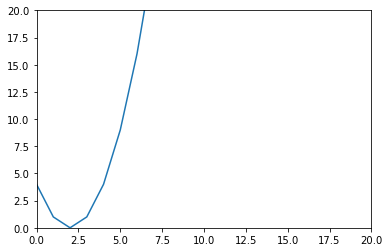

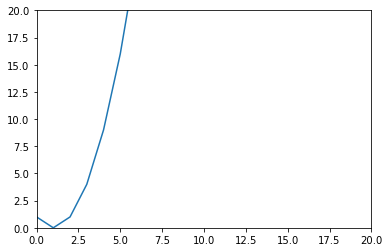

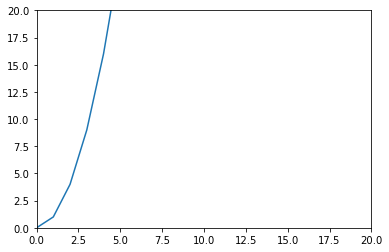

In [30]:
def graph(formula):
    x1 = np.array(range(0, 20))
    J = eval(formula)
    plt.plot(x1,J)
    plt.ylim(0, 20)
    plt.xlim(0,20)
    plt.show()
    
# x2 = 0
#J = (x1 - 2)**2
graph('(x1 - 2)**2')

# x2 = 1
#J = (x1 - 1)**2
graph('(x1 - 1)**2')

# x2 = 2
#J = (x1)**2
graph('(x1)**2')

##### c)

In [ ]:
x1 + x2 - 2 = 0
x1 + x2 = 2
# This condition has to be true, so any value that satisfies
# this condition would minimise J

## 2. Closed Form Linear Regression

In [4]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn import linear_model
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sb

In [5]:
#1
df = pd.read_csv('x06Simple.csv')
del df['Index']

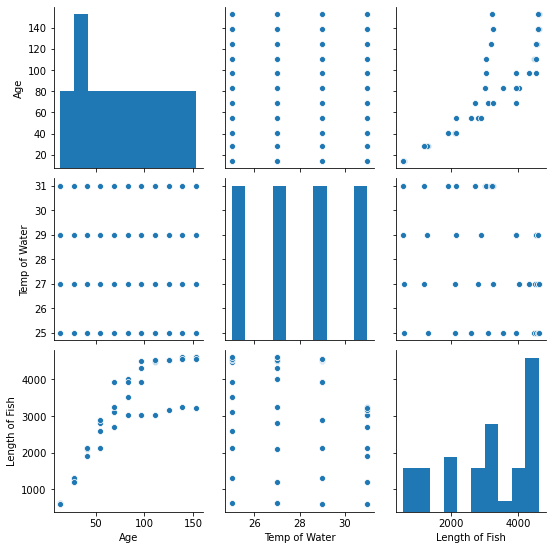

In [6]:
sb.pairplot(df)

In [7]:
#2
df = df.sample(frac=1)

In [8]:
#3
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

In [9]:
print(train_df)
print()
print(test_df)

    Age  Temp of Water  Length of Fish
7   111             25            4465
22   14             29             590
13   41             27            2110
35   41             31            1915
40  111             31            3040
15   69             27            3255
5    83             25            3535
36   55             31            2140
19  125             27            4535
12   28             27            1215
33   14             31             590
24   41             29            2140
42  139             31            3257
16   83             27            4015
39   97             31            3030
10  153             25            4600
2    41             25            2120
14   55             27            2805
29  111             29            4520
31  139             29            4565
25   55             29            2890
41  125             31            3180
17   97             27            4315
32  153             29            4566
26   69             29   

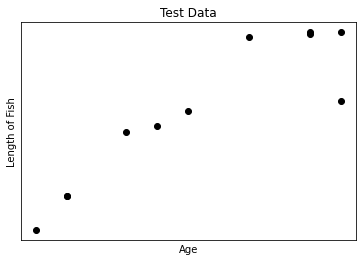

In [10]:
#4
from sklearn import preprocessing
std = preprocessing.scale(train_df)
# print(train_df)
# print(std)
# train_df.plot('Age', 'Length of Fish', kind='scatter')
# train_df.plot('Age', 'Temp of Water', kind='scatter')
# train_df.plot('Temp of Water', 'Length of Fish', kind='scatter')


plt.scatter(test_df['Age'], test_df['Length of Fish'], color='black')
plt.title('Test Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
plt.xticks(())
plt.yticks(())
plt.show()

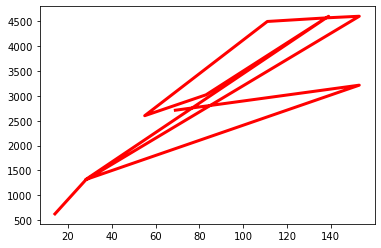

In [11]:

regr = linear_model.LinearRegression(normalize=True)

regr.fit(train_df[['Age', 'Length of Fish']], train_df['Length of Fish'])

# regr.predict(test_df[['Age', 'Length of Fish']])
# regr.score(train_df[['Age', 'Length of Fish']], train_df['Length of Fish'])
plt.plot(test_df['Age'], regr.predict(test_df[['Age', 'Length of Fish']]), color='red', linewidth=3)

# reg = LinearRegression().fit(df['Age'], df['Length of Fish'])

1.0
